<a href="https://colab.research.google.com/github/Seyed-Ali-Ahmadi/Digital-Image-Processing/blob/master/DIP_course_4th_session_Point_Pixel_Processing_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a useful link. Take a look at it.

[Digital Image Processing Tutorials](https://www.tutorialspoint.com/dip/index.htm)

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

In [0]:
aerial = imread('/content/aerial_image.tif')
low = imread('/content/einstein low.tif')
med = imread('/content/einstein med.tif')
high = imread('/content/einstein high.tif')
top = imread('/content/top.tif')
top2 = imread('/content/2nd.tif')
mars = imread('/content/mars.tif')

In [4]:
aerial.shape, low.shape, mars.shape

((769, 765), (679, 800), (1000, 683))

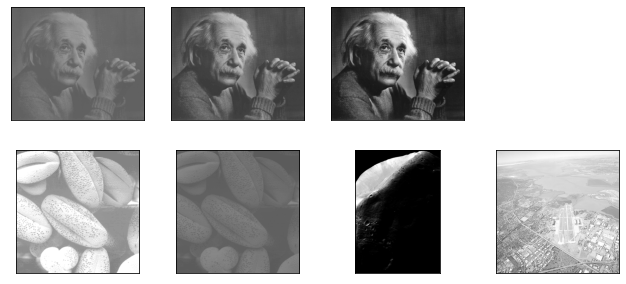

In [5]:
# Display all images
plt.figure(figsize=(11, 5))

plt.subplot(241), plt.xticks([]), plt.yticks([])
plt.imshow(low, cmap='gray', vmin=0, vmax=255)

plt.subplot(242), plt.xticks([]), plt.yticks([])
plt.imshow(med, cmap='gray', vmin=0, vmax=255)

plt.subplot(243), plt.xticks([]), plt.yticks([])
plt.imshow(high, cmap='gray', vmin=0, vmax=255)

plt.subplot(245), plt.xticks([]), plt.yticks([])
plt.imshow(top, cmap='gray', vmin=0, vmax=255)

plt.subplot(246), plt.xticks([]), plt.yticks([])
plt.imshow(top2, cmap='gray', vmin=0, vmax=255)

plt.subplot(247), plt.xticks([]), plt.yticks([])
plt.imshow(mars, cmap='gray', vmin=0, vmax=255)

plt.subplot(248), plt.xticks([]), plt.yticks([])
plt.imshow(aerial, cmap='gray', vmin=0, vmax=255)

plt.show()

# Image Histogram
The histogram of a digital image with intensity levels in the range [0, L-1] is a discrete function h(r_k)=n_k where r_k is the kth intensity value and n_k is the number of pixels in the image with intensity r_k. It is common practice to normalize a histogram by dividing each of its components by the total number of pixels in the image, denoted by the product MN, where, as usual, M and N are the row and column dimensions of the image.

[Learn more about histograms](https://www.allaboutcircuits.com/technical-articles/image-histogram-characteristics-machine-learning-image-processing/)




## Histogram of an image

It's just like a "Probability Density Function (PDF)" of a set of numbers. These numbers are arranged in an array which is the image. 

For every DN-value in the image, histogram of the image will show the number of occurrences of that DN-value in the image array.

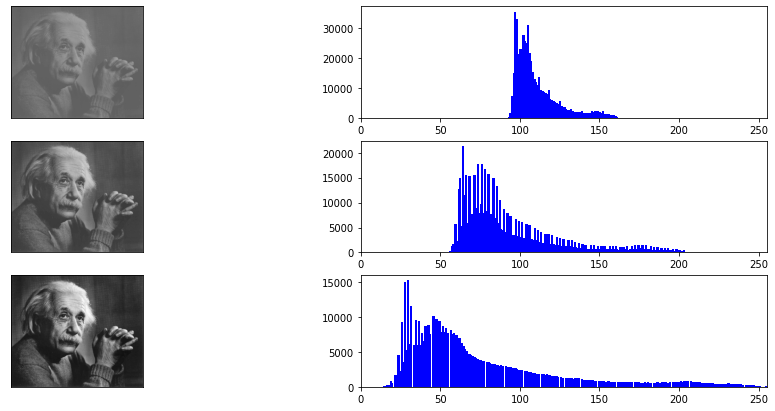

In [15]:
# Compute histogram of the image
hist = np.histogram(image, bins=256)

plt.figure(figsize=(16, 7))

# Low
hist = np.histogram(low, bins=256)
plt.subplot(321), plt.xticks([]), plt.yticks([])
plt.imshow(low, cmap='gray', vmin=0, vmax=255)
plt.subplot(322), plt.xlim([0, 255])
plt.bar(hist[1][1:], hist[0], color='blue', width=1.5)
# Medium
hist = np.histogram(med, bins=256)
plt.subplot(323), plt.xticks([]), plt.yticks([])
plt.imshow(med, cmap='gray', vmin=0, vmax=255)
plt.subplot(324), plt.xlim([0, 255])
plt.bar(hist[1][1:], hist[0], color='blue', width=1.5)
# High
hist = np.histogram(high, bins=256)
plt.subplot(325), plt.xticks([]), plt.yticks([])
plt.imshow(high, cmap='gray', vmin=0, vmax=255)
plt.subplot(326), plt.xlim([0, 255])
plt.bar(hist[1][1:], hist[0], color='blue', width=1.5)

plt.show()

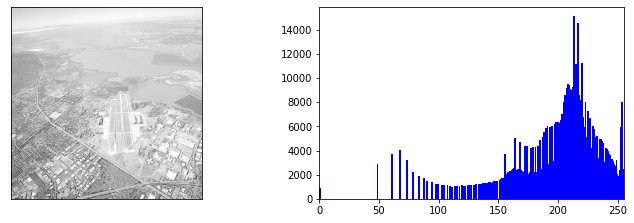

In [22]:
image = aerial
plt.figure(figsize=(12, 12))
hist = np.histogram(image, bins=256)
plt.subplot(321), plt.xticks([]), plt.yticks([])
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.subplot(322), plt.xlim([0, 255])
plt.bar(hist[1][1:], hist[0], color='blue', width=1.5)
plt.show()

## Cumulative Histogram

It is the "Cumulative Density Function (CDF)" of an image histogram. It sums up all the values of the histogram from start to the end of the domain [0, L-1].



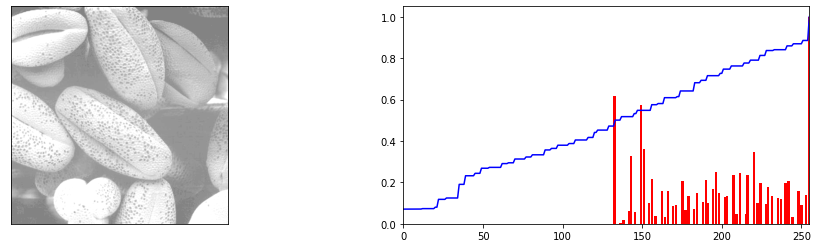

In [23]:
# Compute histogram of the image
hist = np.histogram(top, bins=256)
cdf = hist[0].cumsum()

plt.figure(figsize=(16, 4))
plt.subplot(121), plt.xticks([]), plt.yticks([])
plt.imshow(top, cmap='gray', vmin=0, vmax=255)

plt.subplot(122), plt.xlim([0, 255])
plt.bar(hist[1][1:], hist[0]/np.amax(hist[0]), color='red', width=1.5)
plt.plot(cdf/np.amax(cdf), 'b')
plt.show()

# Histogram Processing
Histogram of an image can share valuable information with us.



## Thresholding

Thresholding is the simplest histogram processing application.

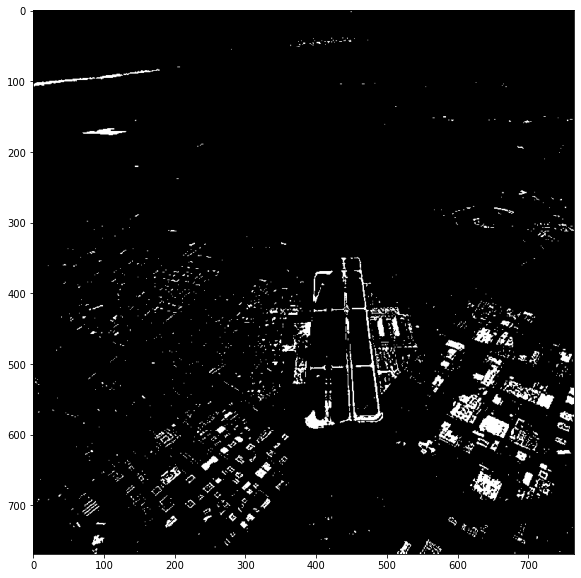

In [38]:
plt.figure(figsize=(10, 10))
plt.imshow(aerial > 250, cmap='gray')
plt.show()

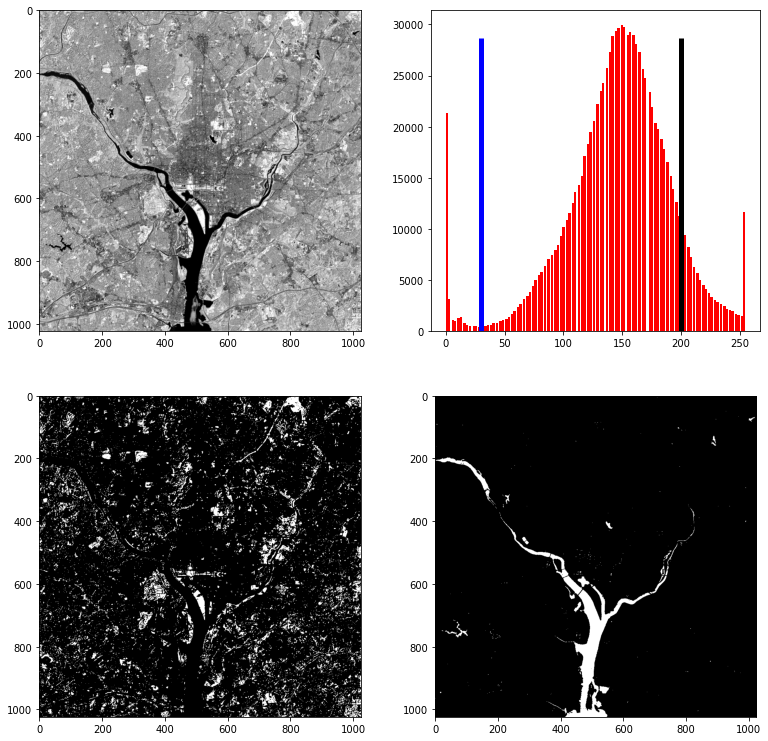

In [40]:
washington = imread('/content/washingtonNIR.tif')
hist_nir = np.histogram(washington, bins=256)

t1 = 200 # black line
t2 = 30 # blue line
thresholded1 = washington > t1
thresholded2 = washington < t2

plt.figure(figsize=(13, 13))
plt.subplot(221), plt.imshow(washington, cmap='gray', vmin=0, vmax=255)

plt.subplot(222), plt.bar(hist_nir[1][1:], hist_nir[0], color='red', width=2)
plt.vlines(t1, 0, np.amax(hist[0]), colors='k', linewidth=5)
plt.vlines(t2, 0, np.amax(hist[0]), colors='b', linewidth=5)

plt.subplot(223), plt.imshow(thresholded1, cmap='gray')

plt.subplot(224), plt.imshow(thresholded2, cmap='gray')
plt.show()

## Image Enhancement (Contrast Enhancement)

The process to enhance the visual quality of an image by manipulating its histogram (contrast) is called contrast enhancement. This process can be performed by using multiple linear or non-linear functions.


![Contrast Enhancement](http://s10.picofile.com/file/8396259576/9gIw6.png)

### Histogram Stretching


![Histogram stretching definition](http://s10.picofile.com/file/8396260626/transformation.PNG)


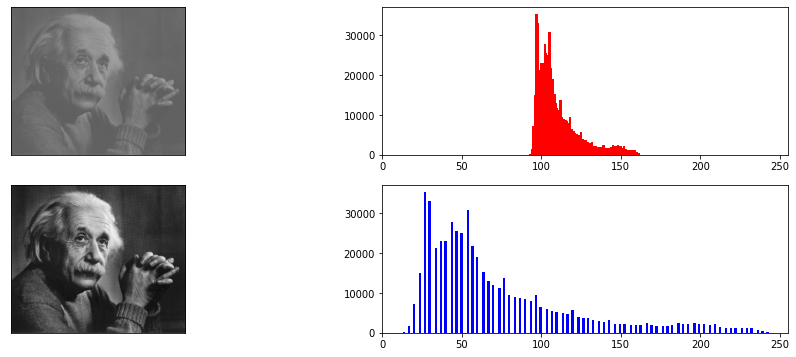

In [42]:
# Compute histogram of the image
image = low
hist_img = np.histogram(image, bins=256)

# Create the stretched image by normalizing it between 0 and L-1.
stretched = (255 - 0) / (np.amax(image) - np.amin(image)) * (image - np.amin(image))
hist_strch = np.histogram(stretched, bins=256)

# Original image ---------------------------------------------------
plt.figure(figsize=(16, 6))
plt.subplot(221), plt.xticks([]), plt.yticks([])
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

plt.subplot(222), plt.xlim([0, 255])
plt.bar(hist_img[1][1:], hist_img[0], color='red', width=1.5)

# Stretched image ---------------------------------------------------
plt.subplot(223), plt.xticks([]), plt.yticks([])
plt.imshow(stretched, cmap='gray', vmin=0, vmax=255)

plt.subplot(224), plt.xlim([0, 255])
plt.bar(hist_strch[1][1:], hist_strch[0], color='blue', width=1.5)

plt.show()

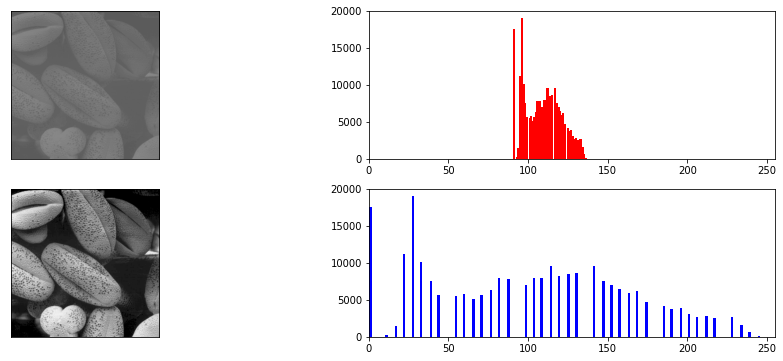

In [51]:
# Compute histogram of the image
image = top2
hist_img = np.histogram(image, bins=256)

# Create the stretched image by normalizing it between 0 and L-1.
stretched = 255 / (np.amax(image) - np.amin(image)) * (image - np.amin(image))
hist_strch = np.histogram(stretched, bins=256)

# Original image ---------------------------------------------------
plt.figure(figsize=(16, 6))
plt.subplot(221), plt.xticks([]), plt.yticks([])
plt.imshow(image, cmap='gray', vmin=0, vmax=255)

plt.subplot(222), plt.xlim([0, 255])
plt.bar(hist_img[1][1:], hist_img[0], color='red', width=1.5)

# Stretched image ---------------------------------------------------
plt.subplot(223), plt.xticks([]), plt.yticks([])
plt.imshow(stretched, cmap='gray', vmin=0, vmax=255)

plt.subplot(224), plt.xlim([0, 255])
plt.bar(hist_strch[1][1:], hist_strch[0], color='blue', width=1.5)

plt.show()

# Intensity Transformation

These are some basic Point (Pixel) Processing techniques that enhance the contrast and visual quality of an image in different situations.



1.   Negative of an image
2.   Log transformation
3.   n-th power transformation
4.   piecewise transformation


![Intensity transformations](http://s5.picofile.com/file/8397183884/IntensityTransformations.PNG)




## Negative of an image

output = (L-1) - input


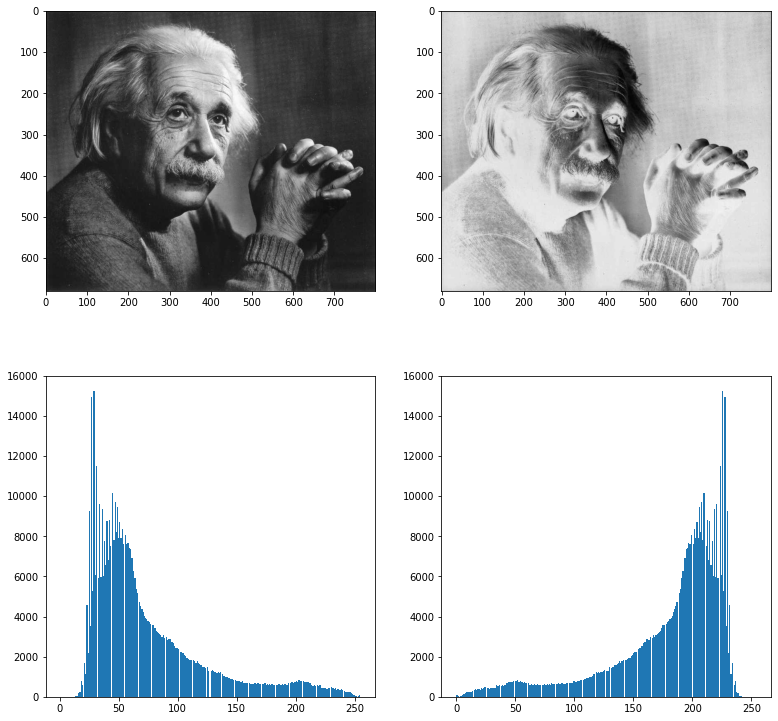

In [65]:
image = high

negative = 255 - image

plt.figure(figsize=(13, 13))

plt.subplot(221)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.subplot(223)
plt.hist(image.ravel(), bins=256)

plt.subplot(222)
plt.imshow(negative, cmap='gray', vmin=0, vmax=255)
plt.subplot(224)
plt.hist(negative.ravel(), bins=256)

plt.show()

## Log transformation

output = c * log(1 + input)


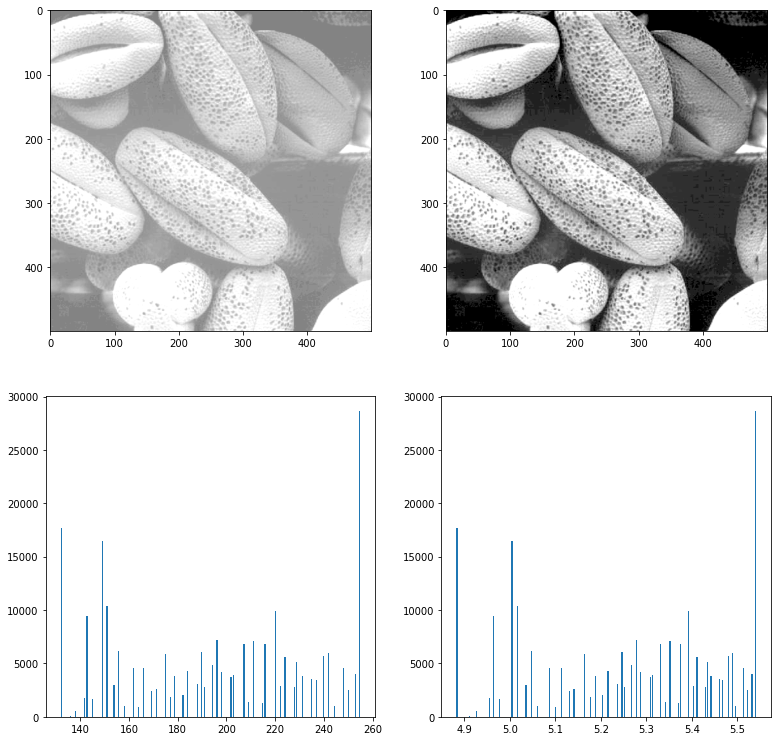

In [82]:
image = top

log_image = np.log(image, dtype=np.float)

plt.figure(figsize=(13, 13))

plt.subplot(221)
plt.imshow(image, cmap='gray', vmin=0, vmax=255)
plt.subplot(223)
plt.hist(image.ravel(), bins=256)

plt.subplot(222)
plt.imshow(log_image, cmap='gray')
plt.subplot(224)
plt.hist(log_image.ravel(), bins=256)

plt.show()

## n-th power transformations

output = c * input ^ gamma

![different gamma values](http://s5.picofile.com/file/8397184900/gamma.PNG)

## Piecewise transformations

![](http://s4.picofile.com/file/8397185068/piecewise.PNG)

![](http://s4.picofile.com/file/8397185142/piecewise2.PNG)

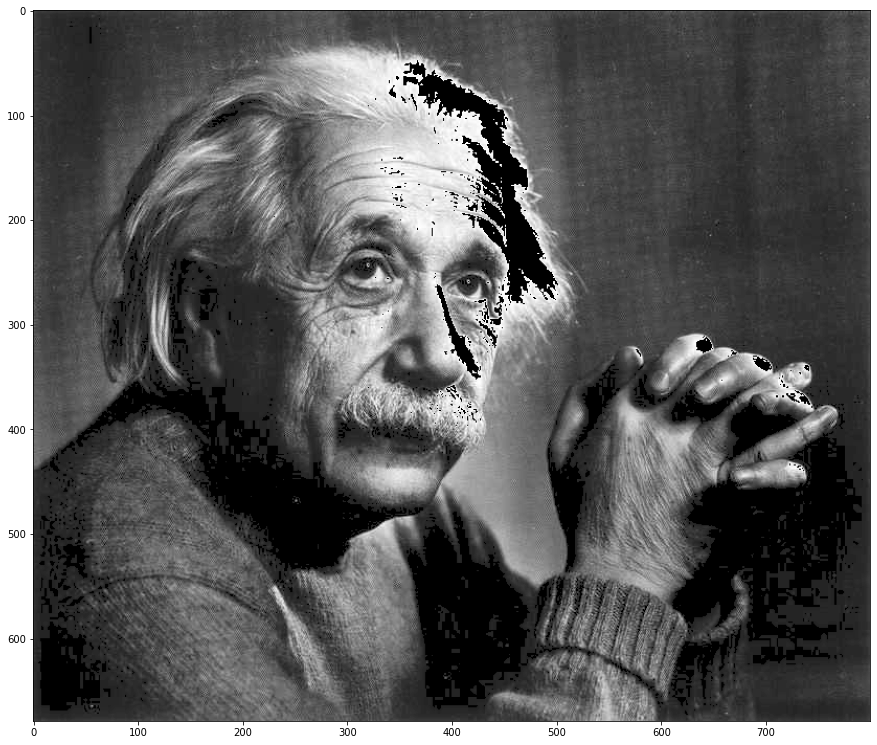

In [110]:
# aerial = imread('/content/aerial_image.tif')
image = high

image[image > 220] = 0
image[image < 30] = 0

plt.figure(figsize=(15, 15))
plt.imshow(image, cmap='gray')
plt.show()